# Auto mpg dataset analysis by Olabode Alamu

I found this dataset very interesting to analyse as it contains useful information about cars made in the 1970s, which happened to be a great period for automobiles.

### Import the libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

% matplotlib inline

In [110]:
# import the csv containing the dataset
Auto = pd.read_csv('auto-mpg.csv')

In [111]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [112]:
# Explore basic statistics of the dataset
Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


General investigations

In [113]:
# What is the highest mpg value?
Auto['mpg'].max()

46.600000000000001

In [114]:
# What car has the max mpg?
Auto[Auto['mpg'] == Auto['mpg'].max()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc


In [115]:
# what car has the lowest mpg?
Auto[Auto['mpg'] == Auto['mpg'].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d


### Data Visualizationa to gain insights into the dataset

But first before we proceed, lets add another column that shows the actual continents where the cars where produced from.

In [116]:
# This function converts the takes in the value from 'origin' column and uses it to tag the car as
# North American (origin = 1), European ( origin = 2), Asian (origin = 3)
def origin_to_continent(column):
    if column == 1:
        return 'North America'
    elif column == 2:
        return 'Europe'
    else:
        return 'Asia'

In [117]:
Auto['Continent'] = Auto['origin'].apply(func = origin_to_continent)

In [118]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Continent
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,North America
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,North America
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,North America
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,North America
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,North America


What region makes the most fuel efficient cars based on the dataset?

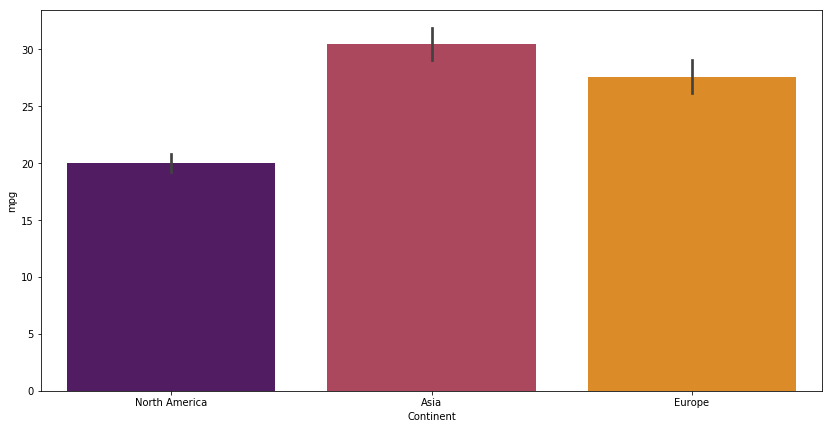

In [209]:
plt.figure(figsize= (14,7))
sns.barplot(x= 'Continent', y= 'mpg' , data = Auto, palette= 'inferno')

It can be seen that cars made from Asia tend to be the most fuel efficient, next to cars made in Europe and lastly to American cars.

What influenece does the number of cylinders have on the mpg of the car accross the different manufacturing regions?

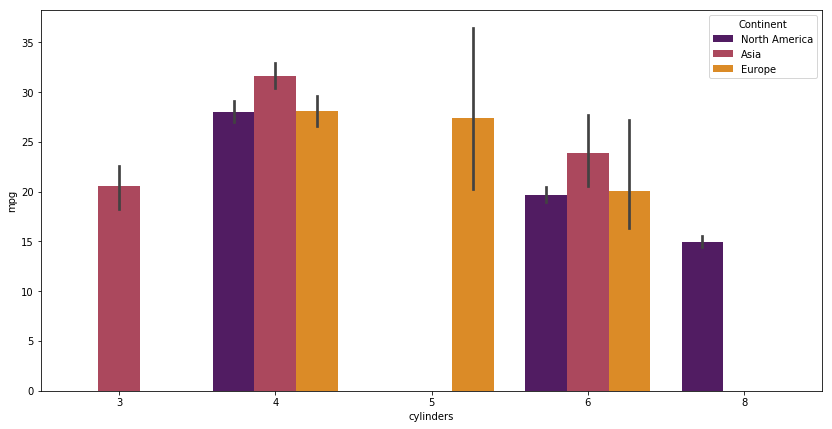

In [208]:
plt.figure(figsize= (14,7))
sns.barplot(x= 'cylinders', y= 'mpg' , data = Auto, hue = 'Continent', palette= 'inferno')

It can be seen from above that in the cylinder groups -3, 4 and 6, cars made in Asia still lead when it comes to fuel economy. It can also be seen that in the 8 cylinders category, only american cars are present.

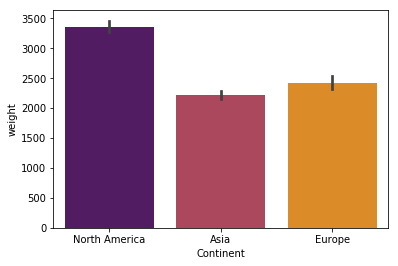

In [121]:
sns.barplot(x= 'Continent', y= 'weight' , data = Auto, palette= 'inferno')

On average, AMerican cars tend to be the heaviest, next to cars made in Europe and least to cars made in Asia.

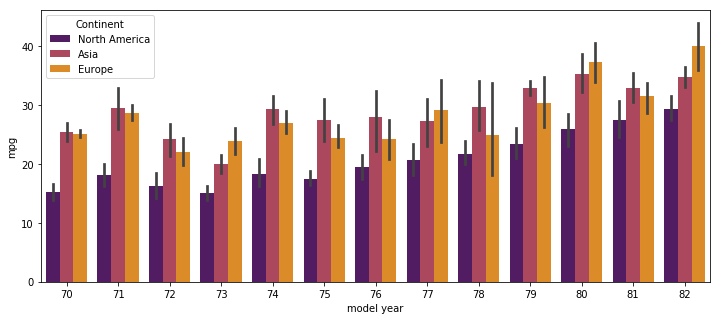

In [122]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'model year', y= 'mpg' , data = Auto, hue = 'Continent', palette= 'inferno')

From 1973 to 1982, there was a gradual improvement in fuel economy across the different continenets. However, cars made in Asia still maintained their top position across the years, except in 1973, 1977,1980 and 1982 when European cars came out on top.

How about engine size? What region leads?

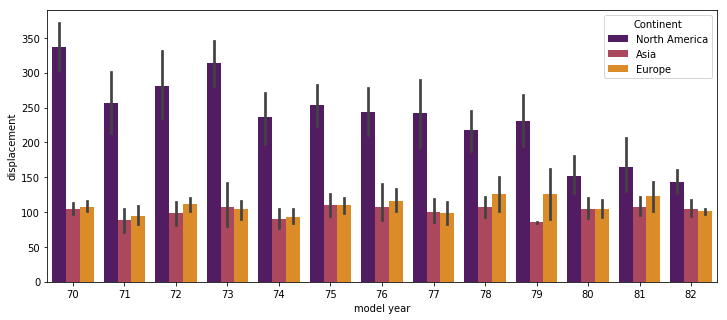

In [123]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'model year', y= 'displacement' , data = Auto, hue = 'Continent', palette= 'inferno')

Yep! you guessed it right! American cars love their big engines.

How about car weight?

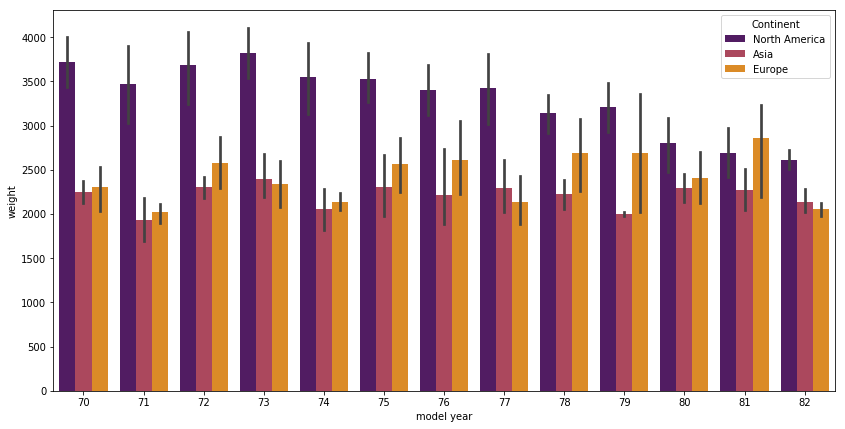

In [190]:
plt.figure(figsize = (14,7))
sns.barplot(x= 'model year', y= 'weight' , data = Auto, hue = 'Continent', palette= 'inferno')

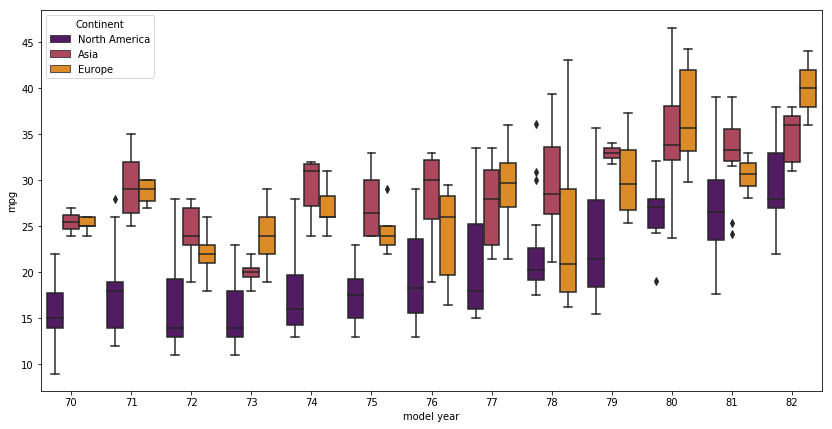

In [191]:
plt.figure(figsize= (14,7))
sns.boxplot(x = 'model year', y = 'mpg', data = Auto, hue = 'Continent', palette= 'inferno')

No surprises there!

To investigate horsepower, we need to clean up the data some more because the horsepower were inputted as a text.

### Data cleaning

It can be seen from the data type column below that the horsepower column is not a numeric value, this needs to be changed.

In [125]:
Auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
Continent        object
dtype: object

In [126]:
# there is a ? in the horsepower column that needs to be removed
Auto.replace('?', np.nan, inplace = True)

In [127]:
Auto.dropna(axis = 0, inplace = True)


In [128]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'Continent'],
      dtype='object')

In [129]:
Auto1 = Auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']]

In [130]:
Auto1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [131]:
#Auto.drop(labels = 'car name', axis = 1, inplace = True)

In [132]:
# The horsepower column is not a float, it needs to be converted
Auto1 = Auto1.astype(float)

In [133]:
Auto1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null float64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model year      392 non-null float64
origin          392 non-null float64
dtypes: float64(8)
memory usage: 27.6 KB


In [134]:
# Investigate the missing values in the dataset
#Auto.isnull().sum()

In [135]:
Auto1['Continent'] = Auto1['origin'].apply(func = origin_to_continent)

In [136]:
Auto1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Continent
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,North America
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,North America
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,North America
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,North America
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,North America


In [137]:
Auto1['Car names'] = Auto['car name']

In [138]:
Auto1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Continent,Car names
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,North America,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,North America,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,North America,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,North America,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,North America,ford torino


### Lets continue the visualizations...

Lets see how the horsepower has changed over time.

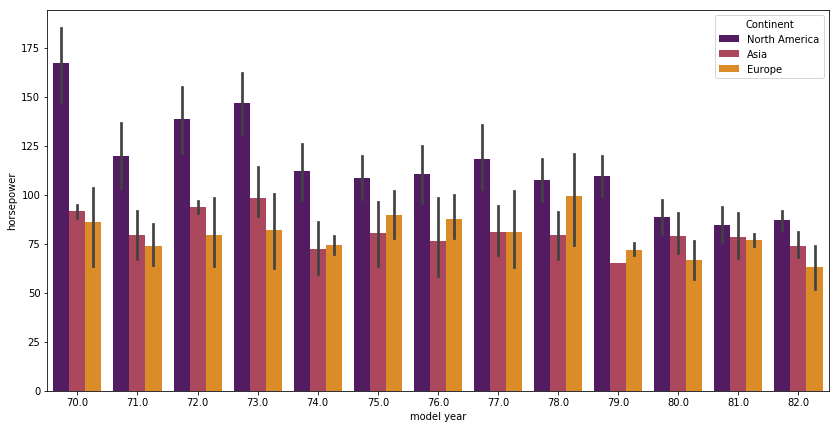

In [192]:
plt.figure(figsize = (14,7))
sns.barplot(x= 'model year', y= 'horsepower' , data = Auto1, hue = 'Continent', palette= 'inferno')

I guess American made cars make up for their large sizes, weight and low fuel economy to come out on top in the 'horsepoer' category.

Maybe American made cars top in the acceleration category... 
### Let the numbers do the talking.

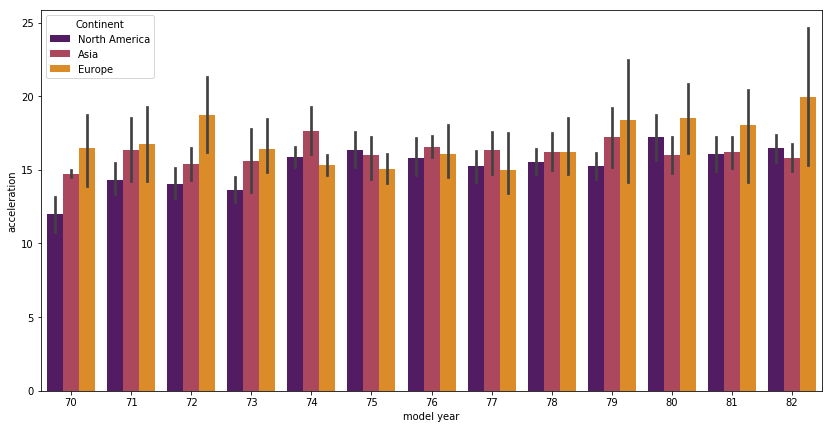

In [193]:
plt.figure(figsize = (14,7))
sns.barplot(x= 'model year', y= 'acceleration' , data = Auto, hue = 'Continent', palette= 'inferno')

I guess the European cars lead this category,except in 1975 when the americans stole the lead. The asians cant be left out though, they won in 1974, 1976,1977, and a tie in 1978.

In [146]:
# What american cars were made in 1975 and 1980?
N1975 = Auto1[Auto1['model year'] == 75]

In [148]:
N1975[N1975['origin']==1]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Continent,Car names
152,19.0,6.0,225.0,95.0,3264.0,16.0,75.0,1.0,North America,plymouth valiant custom
153,18.0,6.0,250.0,105.0,3459.0,16.0,75.0,1.0,North America,chevrolet nova
154,15.0,6.0,250.0,72.0,3432.0,21.0,75.0,1.0,North America,mercury monarch
155,15.0,6.0,250.0,72.0,3158.0,19.5,75.0,1.0,North America,ford maverick
156,16.0,8.0,400.0,170.0,4668.0,11.5,75.0,1.0,North America,pontiac catalina
157,15.0,8.0,350.0,145.0,4440.0,14.0,75.0,1.0,North America,chevrolet bel air
158,16.0,8.0,318.0,150.0,4498.0,14.5,75.0,1.0,North America,plymouth grand fury
159,14.0,8.0,351.0,148.0,4657.0,13.5,75.0,1.0,North America,ford ltd
160,17.0,6.0,231.0,110.0,3907.0,21.0,75.0,1.0,North America,buick century
161,16.0,6.0,250.0,105.0,3897.0,18.5,75.0,1.0,North America,chevroelt chevelle malibu


In [147]:
N1980 = Auto1[Auto1['model year'] == 80]

In [149]:
N1980[N1980['origin']==1]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Continent,Car names
311,32.1,4.0,98.0,70.0,2120.0,15.5,80.0,1.0,North America,chevrolet chevette
313,28.0,4.0,151.0,90.0,2678.0,16.5,80.0,1.0,North America,chevrolet citation
314,26.4,4.0,140.0,88.0,2870.0,18.1,80.0,1.0,North America,ford fairmont
315,24.3,4.0,151.0,90.0,3003.0,20.1,80.0,1.0,North America,amc concord
316,19.1,6.0,225.0,90.0,3381.0,18.7,80.0,1.0,North America,dodge aspen
323,27.9,4.0,156.0,105.0,2800.0,14.4,80.0,1.0,North America,dodge colt


### Data Visualization

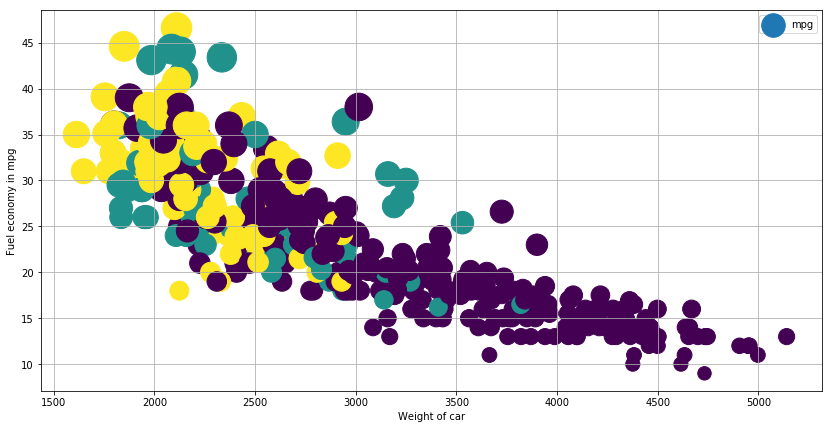

In [210]:
# Some visualizations
plt.figure(figsize= (14,7))
plt.scatter(x = Auto['weight'], y = Auto['mpg'],c = Auto['origin'] , s=20* Auto['mpg'])
plt.xlabel('Weight of car')
plt.ylabel('Fuel economy in mpg')
plt.legend()
plt.grid()
plt.show()


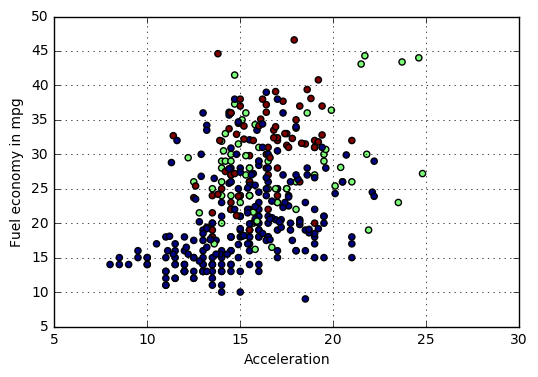

In [17]:

#plt.scatter(x = Auto['horsepower'], y = Auto['mpg'], c = 'b')
plt.scatter(x = Auto['acceleration'], y = Auto['mpg'], c = Auto['origin'])
plt.xlabel('Acceleration')
plt.ylabel('Fuel economy in mpg')
plt.grid()
plt.show()

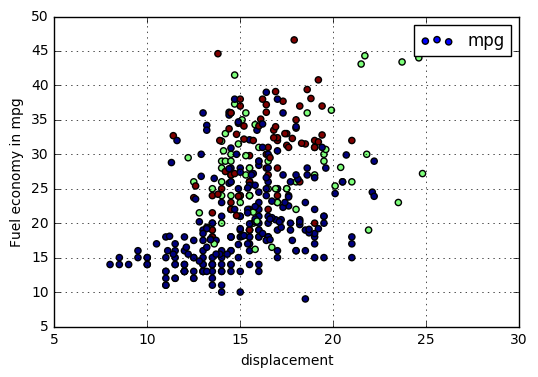

In [18]:
plt.scatter(x = Auto['acceleration'], y = Auto['mpg'], c = Auto['origin'])
plt.xlabel('displacement')
plt.ylabel('Fuel economy in mpg')
plt.grid()
plt.legend()
plt.show()

## Linear regression

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
X = Auto1[['cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'origin','model year']]

In [152]:
# Extract thr input fetures
#X = Auto.drop(axis = 1, labels = ['car name','origin','model year','mpg'])

In [153]:
#X = X[0:]

In [154]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
cylinders       392 non-null float64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
origin          392 non-null float64
model year      392 non-null float64
dtypes: float64(7)
memory usage: 32.5 KB


In [155]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,origin,model year
0,8.0,307.0,130.0,3504.0,12.0,1.0,70.0
1,8.0,350.0,165.0,3693.0,11.5,1.0,70.0
2,8.0,318.0,150.0,3436.0,11.0,1.0,70.0
3,8.0,304.0,150.0,3433.0,12.0,1.0,70.0
4,8.0,302.0,140.0,3449.0,10.5,1.0,70.0


In [157]:
# Extract the output feature
Y = Auto1['mpg']

In [158]:
# split into training and testing data
from sklearn.cross_validation import train_test_split

C:\Users\BODE\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [160]:
# Instantiate the linear regression algorithm
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
# Print the coefficients
lm.coef_


array([-0.4487891 ,  0.02467939, -0.0409978 , -0.00619183,  0.01502601,
        1.77154678,  0.80629991])

In [162]:
lm.intercept_


-20.388456147718603

In [163]:
cdf = pd.DataFrame(lm.coef_ , X.columns , columns = ['Coefficient'])

In [164]:
cdf

,Coefficient
cylinders,-0.448789
displacement,0.024679
horsepower,-0.040998
weight,-0.006192
acceleration,0.015026
origin,1.771547
model year,0.806300


In [168]:
predictions = lm.predict(X_test)

In [172]:
Resultdf = pd.DataFrame(data = {'Predictions': predictions, 'Test values': y_test})

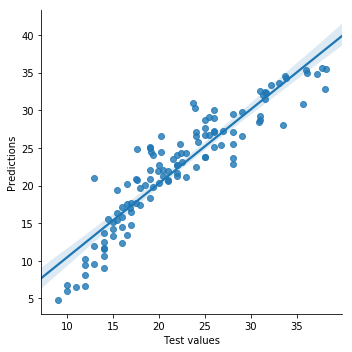

In [202]:
sns.lmplot(x ='Test values' , y ='Predictions' , data = Resultdf)

In [174]:
from sklearn import metrics

In [175]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.28490065807
MSE: 8.49985315666
RMSE: 2.91545076389
